## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,recall_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score,precision_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Importing Dataset

In [2]:
df = pd.read_csv("Maintenance.csv")


## EDA

In [3]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [7]:
df.corr()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.022215,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,-0.023557,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


In [8]:
df.describe

<bound method NDFrame.describe of         UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]

In [9]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

#### Duplicates

In [10]:
#Count of duplicated rows
df[df.duplicated()].shape

(0, 14)

In [11]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [12]:
#Print the duplicated rows
df[df.duplicated()] 

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF


## Plots, Maps and graphs

#### Heat Map

Heat Map displaying the correlations between all columns

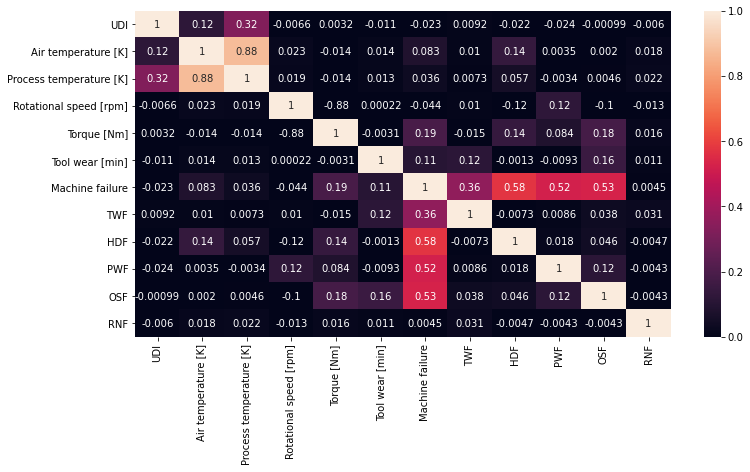

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), vmin=0, vmax=1,annot=True)
plt.show()

In the above diagram, the data cannot be observed properly and we can observe that in few columns the data is ~0 and not having much effect in this visualization hence dropping these columns for EDA purposes to get more crispier understanding

In [14]:
df.drop(['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [15]:
df.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

In [16]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')

In [17]:
df[df.duplicated()].shape 

(0, 7)

In [18]:
df.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Machine failure,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


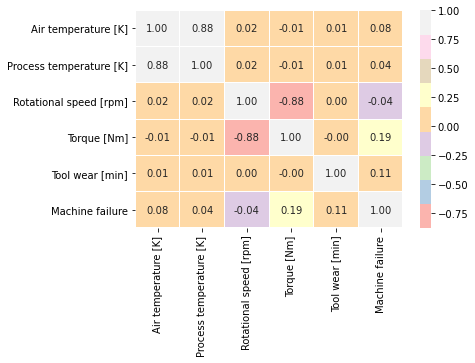

In [19]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='Pastel1',fmt='.2f',linewidth=0.1,linecolor='white')
plt.show()

OBSERVATIONS

    In the above heat map it can observed as Process_temperature and Air_temperature are highly positively correlated whereas, Torque and Rotational_speed are highly negatively correlated. In addition, RPM and Machine failure are also highly negatively correlated.

#### Pair Plot

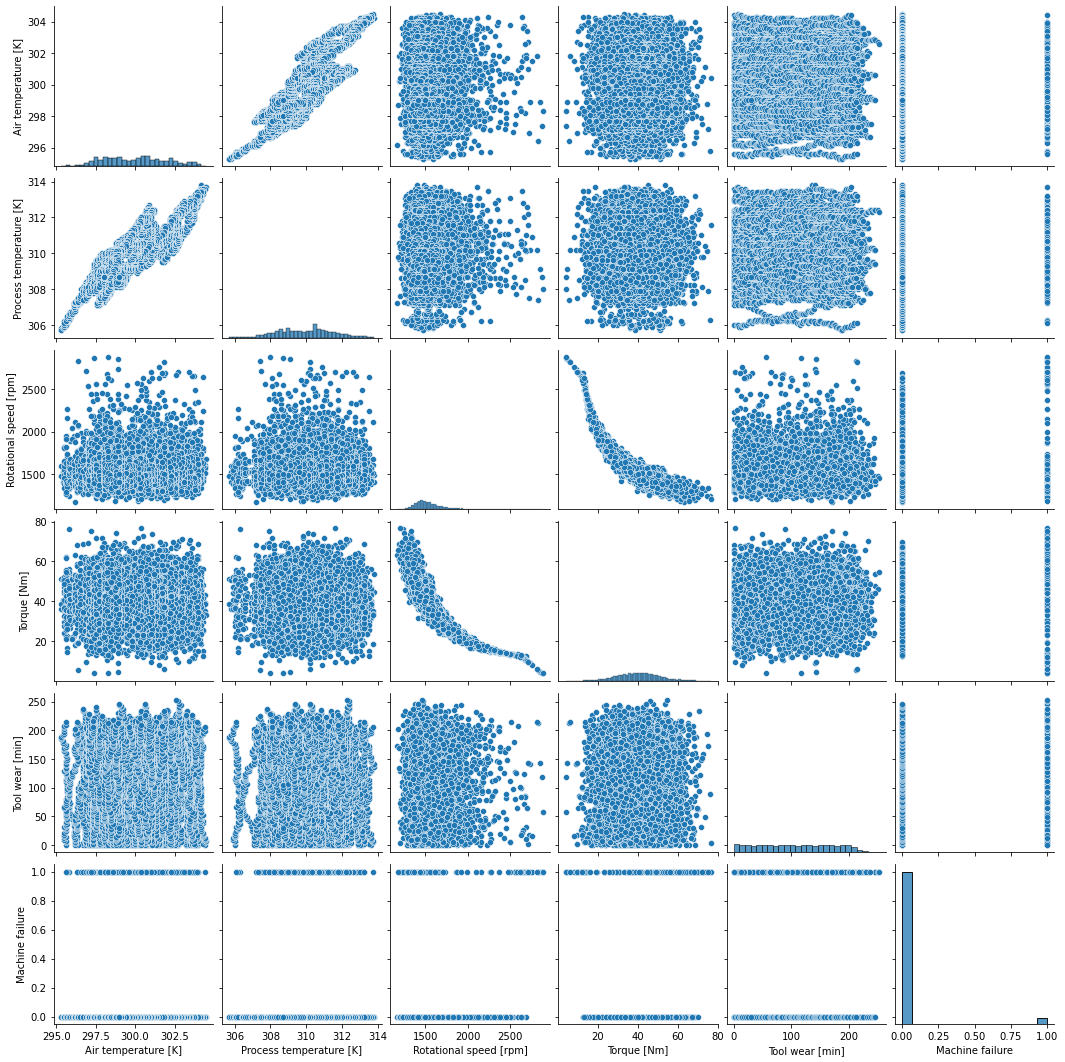

In [20]:
sns.pairplot(df)
plt.show()

#### Histogram

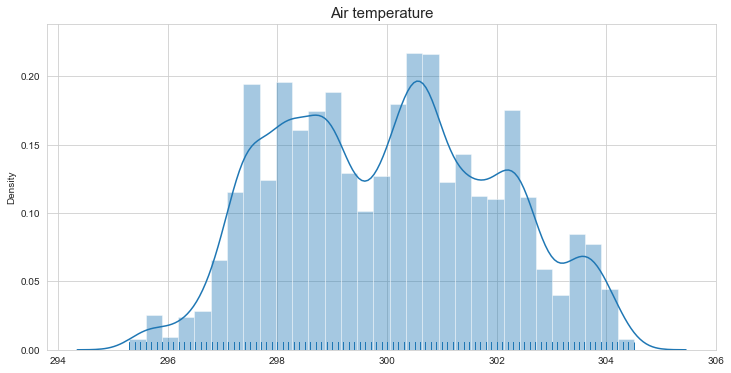

In [21]:
# Air Temperature #
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.distplot(df['Air temperature [K]'].values, kde=True, rug=True)
plt.title("Air temperature",fontsize = 15)
plt.show()

In the above diagram, It can be seen that the Air Temperature show quite consistent data distribution over the wear time. Most of the data in Air Temperature resides around 300 Kelvin.

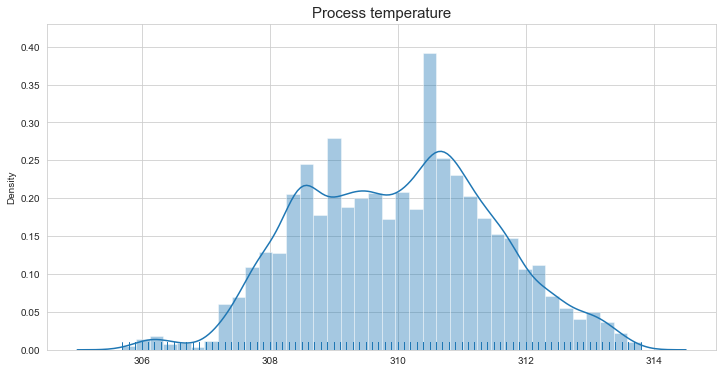

In [22]:
# for Process Temperature 
plt.figure(figsize=(12,6))
sns.distplot(df['Process temperature [K]'].values, kde=True, rug = True )
plt.title("Process temperature",fontsize=15)
plt.show()

In the above diagram, It can be seen that the Process Temperature show quite consistent data distribution over the wear time. Most of the data in Process Temperature resides around 310 Kelvin.

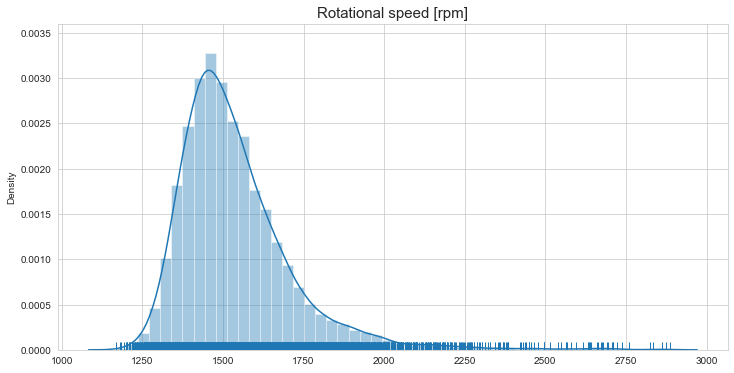

In [23]:
# for Process RPM
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.distplot(df['Rotational speed [rpm]'].values, kde=True, rug=True)
plt.title("Rotational speed [rpm]",fontsize = 15)
plt.show()

In the above figure, it is clearly visible that for Rotational Speed it can be noted that the most of data reside at the speed of 1500 RPM 

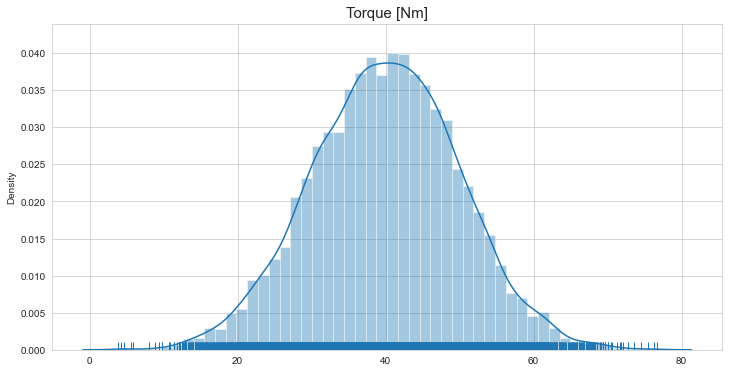

In [24]:
# for Process Torque
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.distplot(df['Torque [Nm]'].values, kde=True, rug=True)
plt.title("Torque [Nm]",fontsize = 15)
plt.show()

In the above figure, it is clearly visible that for Torque it can be noted that the most of data reside at the value of 40 Nm.

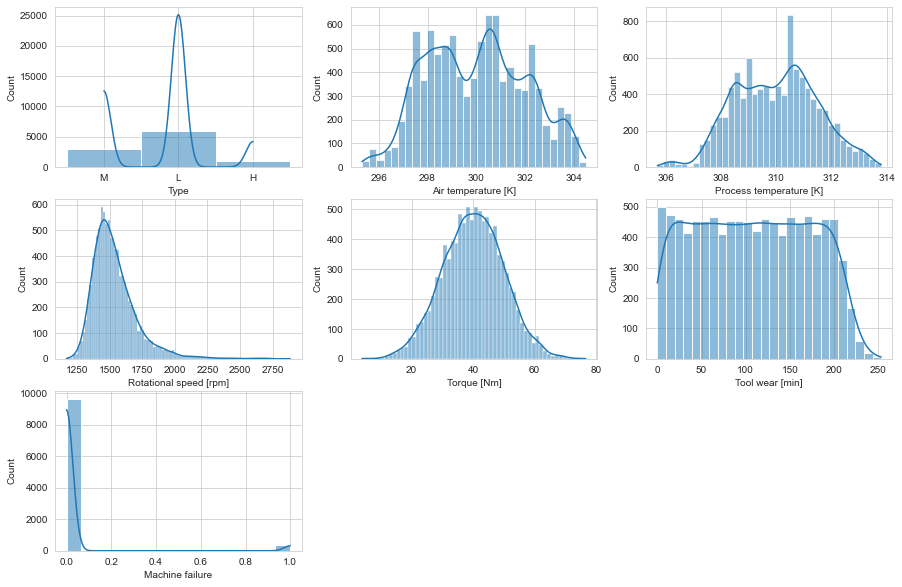

In [25]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

### Note: Any values deviated from the accumulated region may be classified as “Abnormal”. 

Apparently from my observation, there are no abnormalities on the pattern. Next, we will perform skewness analysis to see whether the numerical features are severely skewed or not.

    If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.
    If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.
    If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed


#### Joint Plot

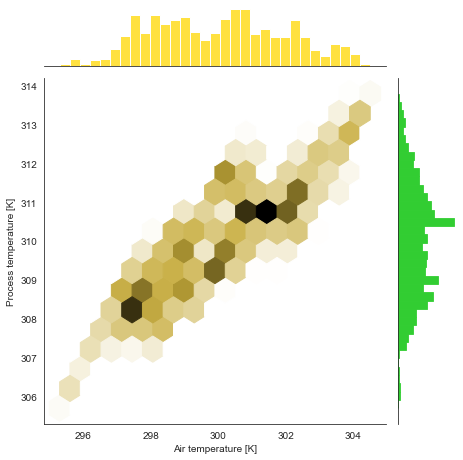

<Figure size 864x432 with 0 Axes>

In [26]:
## we use jointplot to draw a plot of air and process temperature with bivariate and univariate graphs


with sns.axes_style('white') : 
  g = sns.jointplot(data=df,x='Air temperature [K]',y= 'Process temperature [K]', kind = "hex",joint_kws = dict(gridsize=15), 
                    marginal_kws={'color': 'gold'},color="#c9af44", height = 6.50)
  plt.setp(g.ax_marg_y.patches, color = "limegreen")
  plt.figure(figsize=(12,6))
  plt.show()

#### Line Plot

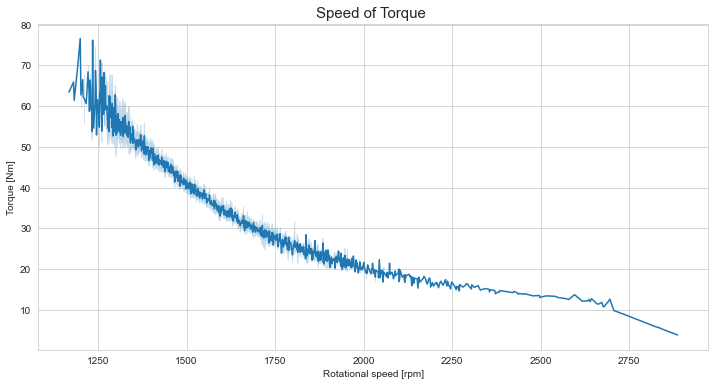

In [27]:
##line chart for the speed of the Torque because we want to know its rotational speed

plt.figure (figsize = (12,6))
sns.lineplot(x="Rotational speed [rpm]", y="Torque [Nm]",data=df)
plt.title ("Speed of Torque ", fontsize = 15)
plt.show()

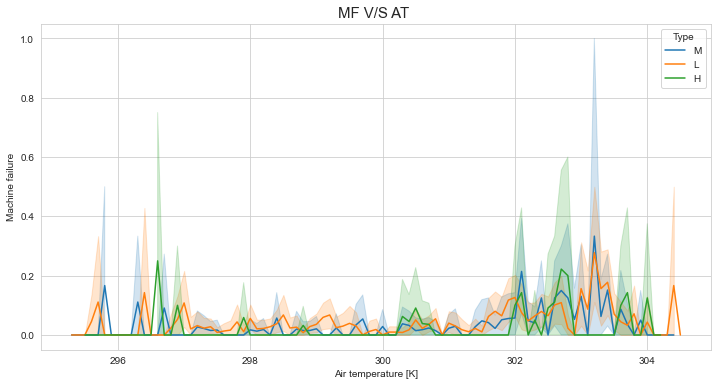

In [28]:
plt.figure (figsize = (12,6))
sns.lineplot(x="Air temperature [K]", y="Machine failure",data=df,hue='Type')
plt.title ("MF V/S AT ", fontsize = 15)
plt.show()

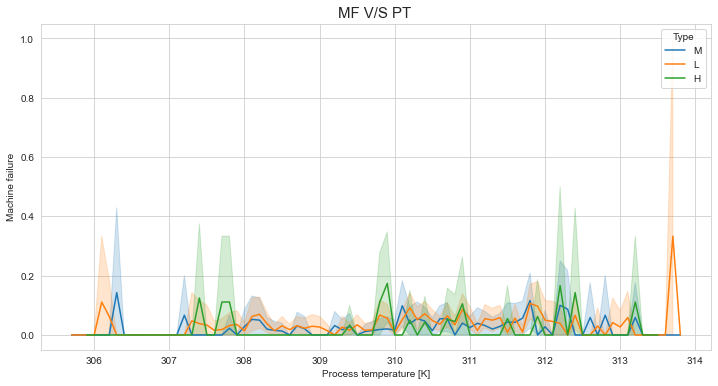

In [29]:
plt.figure (figsize = (12,6))
sns.lineplot(x="Process temperature [K]", y="Machine failure",data=df,hue='Type')
plt.title ("MF V/S PT ", fontsize = 15)
plt.show()

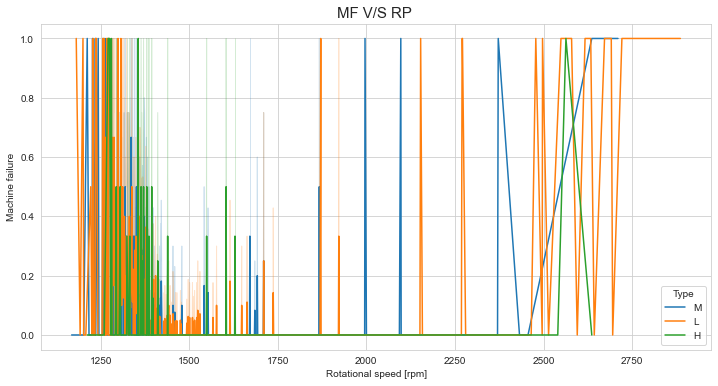

In [30]:
plt.figure (figsize = (12,6))
sns.lineplot(x="Rotational speed [rpm]", y="Machine failure",data=df,hue='Type')
plt.title ("MF V/S RP ", fontsize = 15)
plt.show()

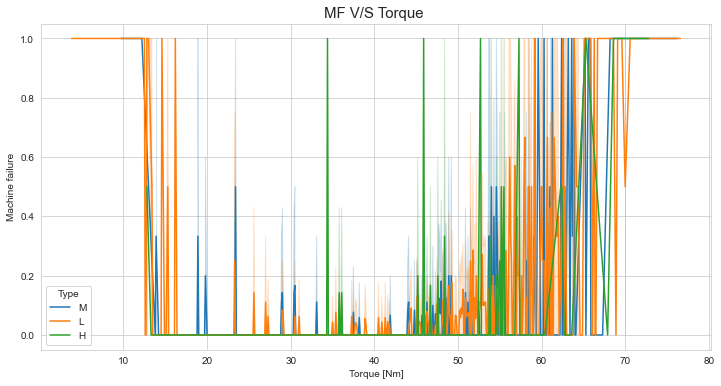

In [31]:
plt.figure (figsize = (12,6))
sns.lineplot(x="Torque [Nm]", y="Machine failure",data=df,hue='Type')
plt.title ("MF V/S Torque ", fontsize = 15)
plt.show()

<AxesSubplot:>

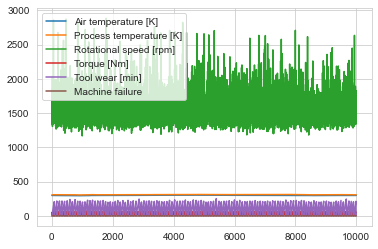

In [32]:
df.plot()

#### Histogram

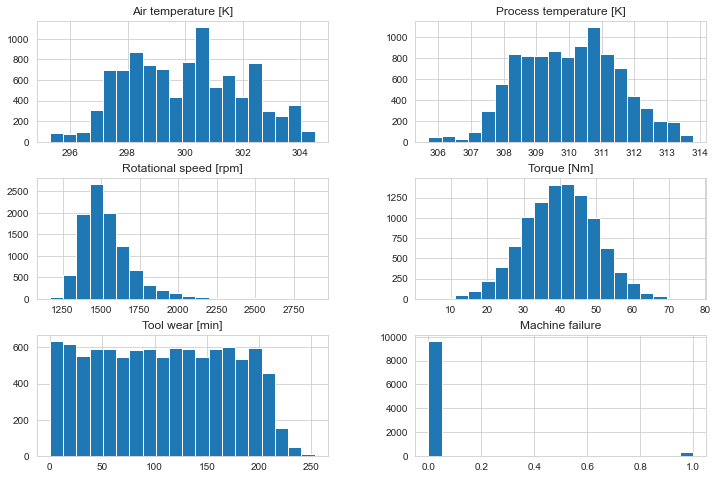

In [33]:
df.hist(figsize=(12,8),bins=20)
plt.show()

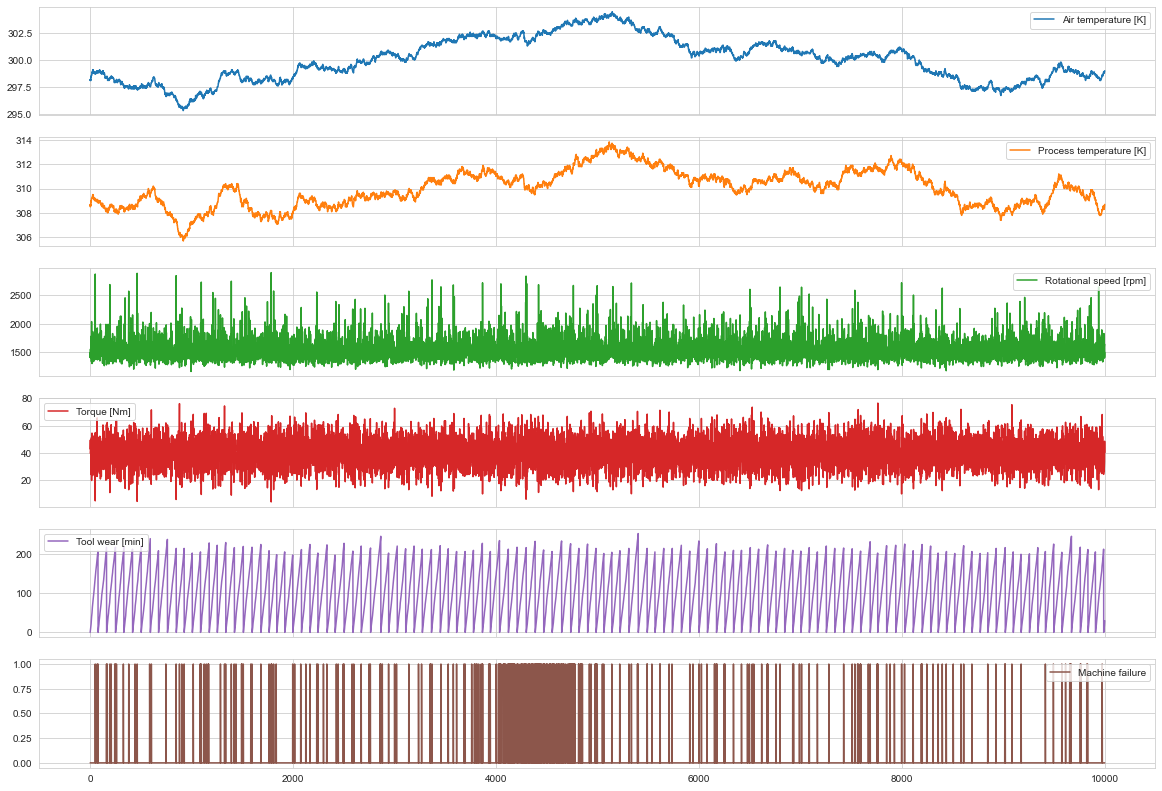

In [34]:
df.plot(subplots=True,figsize=(20,14))
plt.show()

#### Box Plot

Bringing back the whole dataset back from the dropped columns for further EDA 

In [35]:
df = pd.read_csv("Maintenance.csv")

<AxesSubplot:xlabel='OSF'>

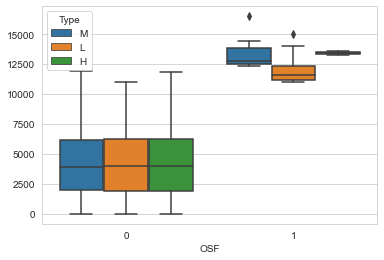

In [36]:
sns.boxplot(x=df["OSF"],y=df["Torque [Nm]"]*df["Tool wear [min]"],hue=df["Type"])

<AxesSubplot:xlabel='PWF', ylabel='Rotational speed [rpm]'>

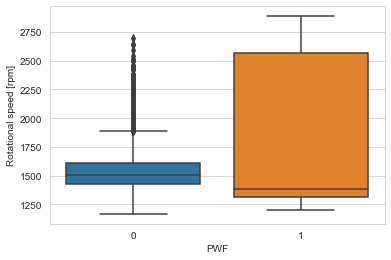

In [37]:
sns.boxplot(x=df["PWF"],y=df["Rotational speed [rpm]"])

<AxesSubplot:xlabel='PWF'>

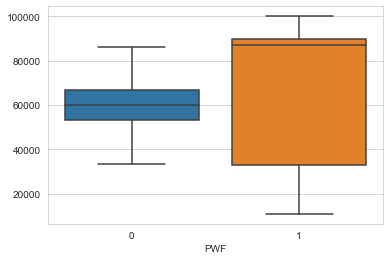

In [38]:
sns.boxplot(x=df["PWF"],y=df["Torque [Nm]"]*df["Rotational speed [rpm]"])

<AxesSubplot:>

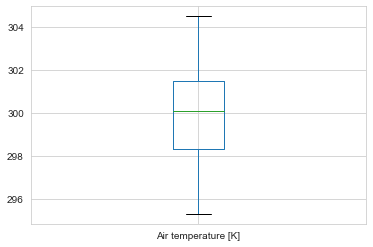

In [39]:
df.boxplot(column= ['Air temperature [K]'])

<AxesSubplot:>

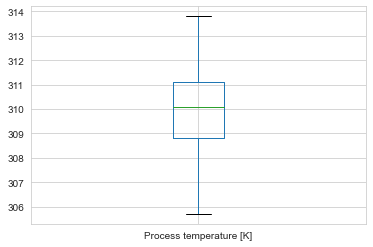

In [40]:
df.boxplot(column= ['Process temperature [K]'])

<AxesSubplot:>

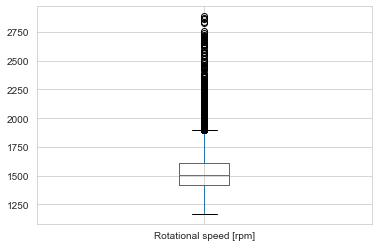

In [41]:
df.boxplot(column= ['Rotational speed [rpm]'])

In the above Box Plot, It can be observed that Rotational Speed [rpm] has many outliers starting from speed around ~1700 to ~2800 rpm.

<AxesSubplot:>

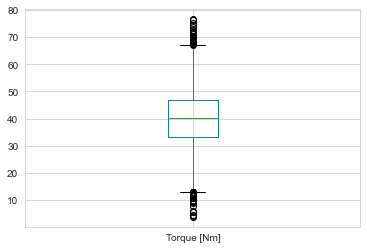

In [42]:
df.boxplot(column= ['Torque [Nm]'])

In the above Box Plot, It can be observed that Torque [Nm] has few outliers starting from around ~1 to ~15 Nm and ~67 to ~78 Nm.

<AxesSubplot:>

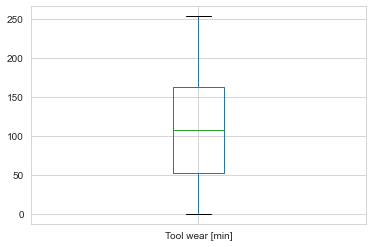

In [43]:
df.boxplot(column= ['Tool wear [min]'])

<AxesSubplot:>

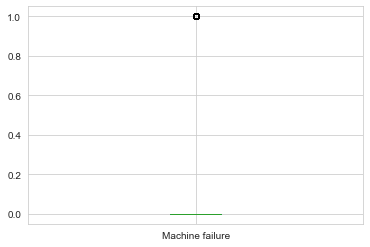

In [44]:
df.boxplot(column= ['Machine failure'])

#### Scatter Plot

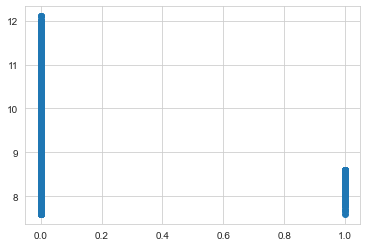

In [45]:
plt.scatter(x=df["HDF"],y=df["Process temperature [K]"]-df["Air temperature [K]"])

#### Count Plot

<AxesSubplot:xlabel='Type', ylabel='count'>

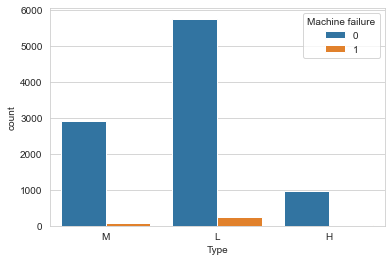

In [46]:
sns.countplot(x="Type", hue="Machine failure", data=df)

L    6000
M    2997
H    1003
Name: Type, dtype: int64


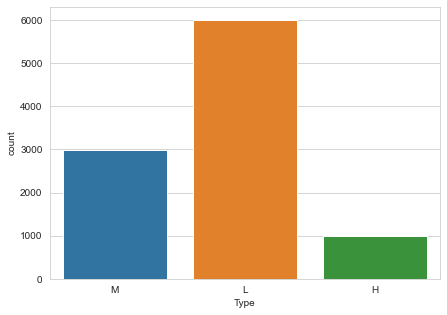

In [47]:
print(df['Type'].value_counts())
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='Type')
plt.show()

product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number.

Type column has 3 types of product variants in this dataset and we can see that machine Type L has higher tendency to fail.

### Pie Chart

A pie chart below shows the distribution of the Machine Failure

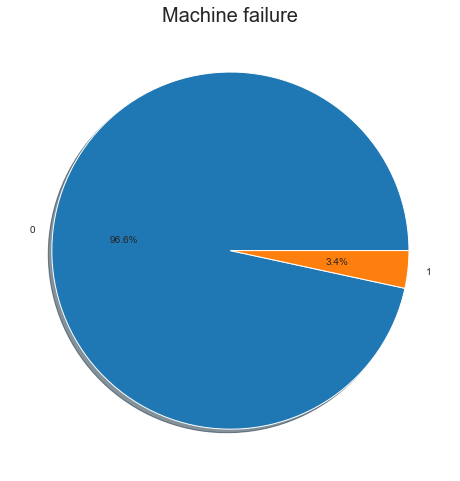

No Failure : 96.6%


In [48]:
labels = df['Machine failure'].astype('category').cat.categories.tolist()
counts = df['Machine failure'].value_counts()
sizes = [counts[machine_name] for machine_name in labels]
plt.figure(figsize=(8,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True)
plt.title("Machine failure", fontsize=20)
plt.show()

print("No Failure : 96.6%")

Here, if at least one of the failure modes is true, the process fails and the 'machine failure' label is set to 1 as per given data dictionary. 
The above pie chart depicts as dataset is consisting of the machine failure of 3.4% of the whole dataset and no machine failure is 96.6%.

### Dropping unnecessary columns from data

Amount of Variation : As the columns TWF, HDF, PWF, OSF, RNF in dataset has very low variation as these features have mostly the same value. If we use these features then the model is not going to learning anything from it hence we will be dropping these columns.

In [49]:
df.drop(['UDI', 'Product ID', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [50]:
df.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

In [51]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')

In [52]:
df[df.duplicated()].shape

(0, 7)

### Data Preprocessing

Converting Categorical data to numerical data 

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [54]:
df['Type']=le.fit_transform(df['Type'])

In [55]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0


As the Type column is Categorical hence it is necessary to convert it to numerical data for further analysis

## Outliers Treatment

### Treating outliers for Torque

<AxesSubplot:>

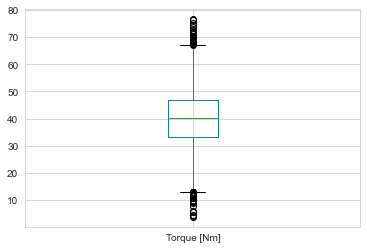

In [56]:
df.boxplot(column= ['Torque [Nm]'])

In [57]:
Q1 = df["Torque [Nm]"].quantile(0.25)

Q3 = df["Torque [Nm]"].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

13.599999999999994


In [58]:
Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

print(Lower_Fence)

print(Upper_Fence)

12.800000000000011
67.19999999999999


<AxesSubplot:>

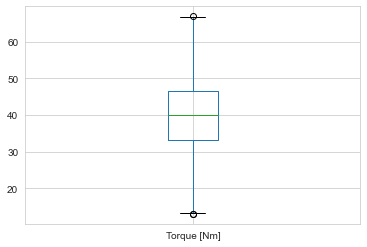

In [59]:
out= df[((df["Torque [Nm]"] < Lower_Fence) |(df["Torque [Nm]"] > Upper_Fence))].index

df = df.drop(out, axis=0)
df.boxplot(column= ['Torque [Nm]'])

### Treating outliers for Rotational speed [rpm]

<AxesSubplot:>

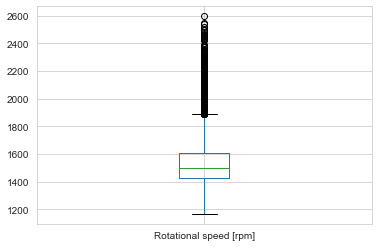

In [60]:
df.boxplot(column= ['Rotational speed [rpm]']) 

In [61]:
Q1 = df["Rotational speed [rpm]"].quantile(0.25)

Q3 = df["Rotational speed [rpm]"].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

187.0


In [62]:
Lower_Fence1 = Q1 - (1.5 * IQR)

Upper_Fence1 = Q3 + (1.5 * IQR)

print(Lower_Fence1)

print(Upper_Fence1)

1143.5
1891.5


<AxesSubplot:>

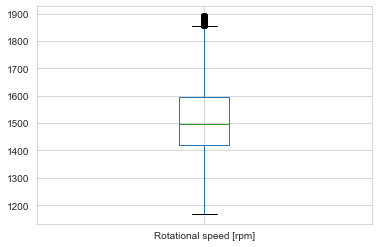

In [63]:
out1= df[((df["Rotational speed [rpm]"] < Lower_Fence1) |(df["Rotational speed [rpm]"] > Upper_Fence1))].index

df = df.drop(out1, axis=0)
df.boxplot(column= ['Rotational speed [rpm]'])

In [64]:
df.corr()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
Type,1.000000,0.016401,0.011979,-0.005571,0.005371,-0.002634,-0.011767
Air temperature [K],0.016401,1.000000,0.875531,0.012881,-0.006591,0.015566,0.091951
Process temperature [K],0.011979,0.875531,1.000000,0.016485,-0.011388,0.015332,0.039451
Rotational speed [rpm],-0.005571,0.012881,0.016485,1.000000,-0.892287,0.007008,-0.172143
Torque [Nm],0.005371,-0.006591,-0.011388,-0.892287,1.000000,-0.006590,0.222470
Tool wear [min],-0.002634,0.015566,0.015332,0.007008,-0.006590,1.000000,0.119609
Machine failure,-0.011767,0.091951,0.039451,-0.172143,0.222470,0.119609,1.000000


In [65]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0
9996,0,298.9,308.4,1632,31.8,17,0
9997,2,299.0,308.6,1645,33.4,22,0
9998,0,299.0,308.7,1408,48.5,25,0


In [66]:
df.drop(['Rotational speed [rpm]'], axis=1, inplace=True)

Correlation (with the Target) : As RPM (Rotational Speed) has very low correlation with Machine failure, it is not going to be useful for the model (prediction). Therefore, we will drop this feature too.

# Balancing the data by Upsampling

In [67]:
!pip install imbalanced-learn

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df.iloc[:,[0,1,2,3,4]], df['Machine failure'])

In [70]:
from collections import Counter
print('Original dataset shape %s' % Counter(df['Machine failure']))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 9262, 1: 267})
Resampled dataset shape Counter({0: 9262, 1: 9262})


In [71]:
df = pd.concat([X_res, y_res], axis=1)
df.head()

,Type,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,2,298.1,308.6,42.8,0,0
1,1,298.2,308.7,46.3,3,0
2,1,298.1,308.5,49.4,5,0
3,1,298.2,308.6,39.5,7,0
4,1,298.2,308.7,40.0,9,0


In [72]:
df

,Type,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,2,298.100000,308.600000,42.800000,0,0
1,1,298.200000,308.700000,46.300000,3,0
2,1,298.100000,308.500000,49.400000,5,0
3,1,298.200000,308.600000,39.500000,7,0
4,1,298.200000,308.700000,40.000000,9,0
...,...,...,...,...,...,...
18519,1,298.370823,308.918039,58.901331,216,1
18520,1,299.835511,309.467755,54.116939,207,1
18521,1,298.657913,308.259072,51.544406,218,1
18522,1,301.479602,310.808159,57.072770,189,1


## Normalization of the data

In [73]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
x = df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled)

In [74]:
df1.columns=(df.columns)
df1

,Type,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Machine failure
0,1.0,0.304348,0.358025,0.484009,0.000000,0.0
1,0.5,0.315217,0.370370,0.558635,0.011858,0.0
2,0.5,0.304348,0.345679,0.624733,0.019763,0.0
3,0.5,0.315217,0.358025,0.413646,0.027668,0.0
4,0.5,0.315217,0.370370,0.424307,0.035573,0.0
...,...,...,...,...,...,...
18519,0.5,0.333785,0.397289,0.827320,0.853755,1.0
18520,0.5,0.492990,0.465155,0.725308,0.818182,1.0
18521,0.5,0.364991,0.315935,0.670456,0.861660,1.0
18522,0.5,0.671696,0.630637,0.788332,0.747036,1.0


In [75]:
df1.describe()

,Type,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Machine failure
count,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000
mean,0.539111,0.568817,0.553099,0.563045,0.511349,0.500000
std,0.266385,0.213976,0.162545,0.223081,0.280470,0.500013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.391304,0.434975,0.385928,0.263834,0.000000
50%,0.500000,0.586957,0.577964,0.582356,0.537549,0.500000
75%,0.500000,0.754141,0.664320,0.729921,0.786561,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     18524 non-null  float64
 1   Air temperature [K]      18524 non-null  float64
 2   Process temperature [K]  18524 non-null  float64
 3   Torque [Nm]              18524 non-null  float64
 4   Tool wear [min]          18524 non-null  float64
 5   Machine failure          18524 non-null  float64
dtypes: float64(6)
memory usage: 868.4 KB


### Splitting the data into test and train

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
train = df1.iloc[:,:5] 
(train)
test = df1.iloc[:,5]
test

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18519    1.0
18520    1.0
18521    1.0
18522    1.0
18523    1.0
Name: Machine failure, Length: 18524, dtype: float64

In [79]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=0.2)

Splitted Data in to 80% and 20%

In [80]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (14819, 5) (14819,)
Test set: (3705, 5) (3705,)


## Model Building

# Decision Tree

In [81]:
df = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
df # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [82]:
df.fit(x_train,y_train)
predTree = df.predict(x_test)

In [83]:
print (predTree [0:5])
print (y_test [0:5])

[1. 0. 1. 1. 1.]
9631     1.0
2145     0.0
17252    1.0
13529    1.0
18310    1.0
Name: Machine failure, dtype: float64


In [84]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9055330634278003


In [85]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predTree)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.85


In [86]:
print('accuracyscore is    : ',round(accuracy_score(y_test,predTree),3))
dt_accuraccy = round(accuracy_score(y_test,predTree),3)
print('precision is        : ',round(precision_score(y_test,predTree),3))
print('AUc score is        : ',round(roc_auc_score(y_test,predTree),3))
print('recall value is     : ',round(recall_score(y_test,predTree),3))
dt_recall = round(recall_score(y_test,predTree),3)
print('classification report is: \n', classification_report(y_test,predTree))
dt_prec = np.round(precision_score(y_test,predTree),3)
dt_prec
dt_f1 = np.round(f1_score(y_test,predTree),3)
dt_f1
    
print(confusion_matrix(y_test,predTree))

accuracyscore is    :  0.906
precision is        :  0.867
AUc score is        :  0.906
recall value is     :  0.957
classification report is: 
               precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      1859
         1.0       0.87      0.96      0.91      1846

    accuracy                           0.91      3705
   macro avg       0.91      0.91      0.91      3705
weighted avg       0.91      0.91      0.91      3705

[[1589  270]
 [  80 1766]]


# Support Vector Mahcine

In [87]:
import numpy as np
from sklearn.svm import SVC

In [88]:
clf = SVC(C= 20, gamma = 52)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
svm_acc = accuracy_score(y_test, y_pred)
print("Accuracy =", svm_acc)
svm_prec = np.round(precision_score(y_test,y_pred),3)
svm_prec
svm_f1 = np.round(f1_score(y_test,y_pred),3)
svm_f1

confusion_matrix(y_test, y_pred)

Accuracy = 0.9681511470985156


array([[1755,  104],
       [  14, 1832]], dtype=int64)

In [89]:
print("recall score :",np.round(recall_score(y_test,y_pred),3))
svm_recall = np.round(recall_score(y_test,y_pred),3)

recall score : 0.992


# Naive Bays Multinomial

In [90]:
from sklearn.naive_bayes import MultinomialNB  

In [91]:
mb = MultinomialNB()
mb.fit(x_train,y_train)

MultinomialNB()

In [92]:
pred_mb = mb.predict(x_test)

In [93]:
print("accuraccy score :",np.round(accuracy_score(y_test,pred_mb),3))
nbmb_acc = np.round(accuracy_score(y_test,pred_mb),3)
print("recall score :",np.round(recall_score(y_test,pred_mb),3))
nbmb_recall = np.round(recall_score(y_test,pred_mb),3)
print("f1 score :",np.round(f1_score(y_test,pred_mb),3))
nbmb_prec = np.round(precision_score(y_test,pred_mb),3)
nbmb_prec
nbmb_f1 = np.round(f1_score(y_test,pred_mb),3)
nbmb_f1
print("precision score  :",np.round( precision_score(y_test,pred_mb),3))

accuraccy score : 0.757
recall score : 0.802
f1 score : 0.767
precision score  : 0.734


In [94]:
print("Confusion matrix :\n",confusion_matrix(y_test,pred_mb))

Confusion matrix :
 [[1324  535]
 [ 366 1480]]


# Naive Bayes using GaussianNB

In [95]:
from sklearn.naive_bayes import GaussianNB

In [96]:
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [97]:
pred_gb = gb.predict(x_test)

In [98]:
print("accuraccy score :",np.round(accuracy_score(y_test,pred_gb),3))
nbgb_acc = np.round(accuracy_score(y_test,pred_gb),3)
print("recall score :",np.round(recall_score(y_test,pred_gb),3))
nbgb_recall = np.round(recall_score(y_test,pred_gb),3)
print("f1 score :",np.round(f1_score(y_test,pred_gb),3))
print("precision score  :",np.round( precision_score(y_test,pred_gb),3))

nbgb_prec = np.round(precision_score(y_test,pred_gb),3)
nbgb_f1 = np.round(f1_score(y_test,pred_gb),3)

accuraccy score : 0.838
recall score : 0.871
f1 score : 0.843
precision score  : 0.817


In [99]:
print("Confusion matrix :\n",confusion_matrix(y_test,pred_gb))

Confusion matrix :
 [[1499  360]
 [ 239 1607]]


In [100]:
per=((1488  +1701)/(1488  +472+204 +1701))*100
per

82.50970245795601

# K-Neighbour

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [102]:
kn = KNeighborsClassifier(n_neighbors=11)
results = cross_val_score(kn, x_train, y_train, cv=3)

In [103]:
print("result :",np.round(results.mean(),3))

result : 0.933


In [104]:
# choose k between 1 to 41
k_range = range(0,15)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train, y_train, cv=10)
    k_scores.append(scores.mean())

In [105]:
print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred),3))
knn_acc = round(accuracy_score(y_test,y_pred),3)
print('precision is        : ',round(precision_score(y_test,y_pred),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred),3))
print('recall value is     : ',round(recall_score(y_test,y_pred),3))
knn_recall = round(recall_score(y_test,y_pred),3)
knn_prec = np.round(precision_score(y_test,y_pred),3)
knn_f1 = np.round(f1_score(y_test,y_pred),3)

print('classification report is: \n', classification_report(y_test,y_pred))
    
print(confusion_matrix(y_test,y_pred))

accuracyscore is    :  0.968
precision is        :  0.946
AUc score is        :  0.968
recall value is     :  0.992
classification report is: 
               precision    recall  f1-score   support

         0.0       0.99      0.94      0.97      1859
         1.0       0.95      0.99      0.97      1846

    accuracy                           0.97      3705
   macro avg       0.97      0.97      0.97      3705
weighted avg       0.97      0.97      0.97      3705

[[1755  104]
 [  14 1832]]


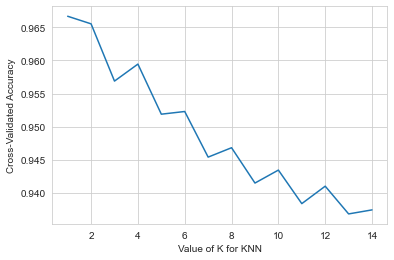

In [106]:
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Random Forest

In [107]:
rf_model=RandomForestClassifier()

accuracyscore is    :  0.975
precision is        :  0.962
AUc score is        :  0.975
recall value is     :  0.989
0.962
classification report is: 
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      1859
         1.0       0.96      0.99      0.98      1846

    accuracy                           0.97      3705
   macro avg       0.98      0.97      0.97      3705
weighted avg       0.98      0.97      0.97      3705

[[1787   72]
 [  21 1825]]


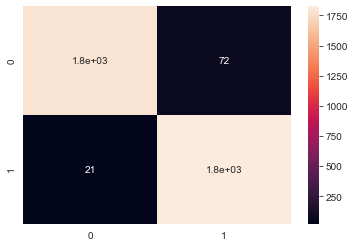

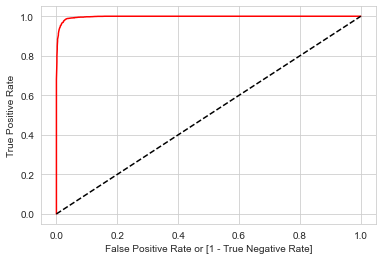

In [108]:
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred),3))
rf_acc = round(accuracy_score(y_test,y_pred),3)
print('precision is        : ',round(precision_score(y_test,y_pred),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred),3))
print('recall value is     : ',round(recall_score(y_test,y_pred),3))
rf_recall =round(recall_score(y_test,y_pred),3)
rf_prec = np.round(precision_score(y_test,y_pred),3)
rf_f1 = np.round(f1_score(y_test,y_pred),3)
print(rf_prec)
print('classification report is: \n', classification_report(y_test,y_pred))
    
print(confusion_matrix(y_test,y_pred))
    
confu_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confu_matrix,annot=True)
plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba (x_test)[:,1])
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

# Adaboosting

In [109]:
ad_model=AdaBoostClassifier()

accuracyscore is    :  0.904
precision is        :  0.9
AUc score is        :  0.904
recall value is     :  0.91
classification report is: 
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      1859
         1.0       0.90      0.91      0.90      1846

    accuracy                           0.90      3705
   macro avg       0.90      0.90      0.90      3705
weighted avg       0.90      0.90      0.90      3705

[[1672  187]
 [ 167 1679]]


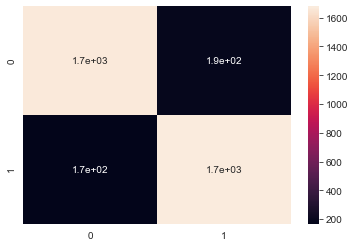

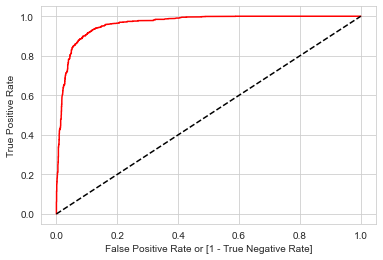

In [110]:
ad_model.fit(x_train,y_train)
y_pred=ad_model.predict(x_test)

print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred),3))
ada_acc = round(accuracy_score(y_test,y_pred),3)
print('precision is        : ',round(precision_score(y_test,y_pred),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred),3))
print('recall value is     : ',round(recall_score(y_test,y_pred),3))
ada_recall = round(recall_score(y_test,y_pred),3)
print('classification report is: \n', classification_report(y_test,y_pred))
ada_prec = np.round(precision_score(y_test,y_pred),3)
ada_f1 = np.round(f1_score(y_test,y_pred),3)
    
print(confusion_matrix(y_test,y_pred))
    
confu_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confu_matrix,annot=True)
plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, ad_model.predict_proba (x_test)[:,1])
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

# Gradient boosting

In [111]:
gb_model=GradientBoostingClassifier()

accuracyscore is    :  0.938
precision is        :  0.92
AUc score is        :  0.938
recall value is     :  0.958
classification report is: 
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      1859
         1.0       0.92      0.96      0.94      1846

    accuracy                           0.94      3705
   macro avg       0.94      0.94      0.94      3705
weighted avg       0.94      0.94      0.94      3705

[[1705  154]
 [  77 1769]]


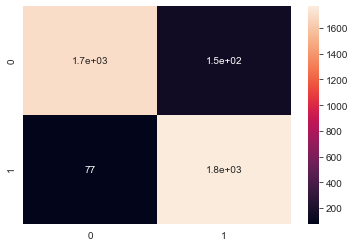

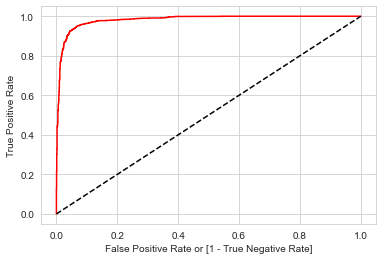

In [112]:
gb_model.fit(x_train,y_train)
y_pred=gb_model.predict(x_test)

print('accuracyscore is    : ',round(accuracy_score(y_test,y_pred),3))
gb_acc = round(accuracy_score(y_test,y_pred),3)
print('precision is        : ',round(precision_score(y_test,y_pred),3))
print('AUc score is        : ',round(roc_auc_score(y_test,y_pred),3))
print('recall value is     : ',round(recall_score(y_test,y_pred),3))
gb_recall = round(recall_score(y_test,y_pred),3)
gb_prec = np.round(precision_score(y_test,y_pred),3)
gb_f1 = np.round(f1_score(y_test,y_pred),3)
print('classification report is: \n', classification_report(y_test,y_pred))
    
print(confusion_matrix(y_test,y_pred))
    
confu_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confu_matrix,annot=True)
plt.show()
    
fpr, tpr, thresholds = roc_curve(y_test, gb_model.predict_proba (x_test)[:,1])
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

## Table

In [113]:
data11 = {"Models":pd.Series(["Decision Tree","SVM","Naive Bayes (multinomial)","Naive Bayes (Gaussian)","Random forest",'KNN','Adaboosting','Gradient boosting']),
          "Accuracy":pd.Series([dt_accuraccy,svm_acc,nbmb_acc,nbgb_acc,rf_acc,knn_acc,ada_acc,gb_acc]),"Recall":pd.Series([dt_recall,svm_recall,nbmb_recall,nbgb_recall,rf_recall,knn_recall,ada_recall,gb_recall]),
          "Precision":pd.Series([dt_prec,svm_prec,nbmb_prec,nbgb_prec,rf_prec,knn_prec,ada_prec,gb_prec]),
          "F1_Score":pd.Series([dt_f1,svm_f1,nbmb_f1,nbgb_f1,rf_f1,knn_f1,ada_f1,gb_f1])}
table = pd.DataFrame(data11)
table.sort_values(['Accuracy'])

,Models,Accuracy,Recall,Precision,F1_Score
2,Naive Bayes (multinomial),0.757000,0.802,0.734,0.767
3,Naive Bayes (Gaussian),0.838000,0.871,0.817,0.843
6,Adaboosting,0.904000,0.910,0.900,0.905
0,Decision Tree,0.906000,0.957,0.867,0.910
7,Gradient boosting,0.938000,0.958,0.920,0.939
5,KNN,0.968000,0.992,0.946,0.969
1,SVM,0.968151,0.992,0.946,0.969
4,Random forest,0.975000,0.989,0.962,0.975
